In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scanpy as sc

from sciso.plot import *

Set plot style

In [2]:
set_nature_style()

## Panel b

### Set paths

In [3]:
# Input
data_dir = Path(r"/media/buglakova/embl_data/data/lipid_isotope/20220411_AB_DKFZACLYac") 
anndata_dir = data_dir / "anndata"
adata_path = anndata_dir / "aclykd_adata_concat_fit.h5ad"
adata_am_path =anndata_dir / "aclykd_adata_am_concat.h5ad"
bulk_data_path = data_dir / "IsoCorrectoR_result_CorrectedFractions.csv"

# Output
plots_path = Path(r"/media/buglakova/embl_data/data/lipid_isotope/") / "figure_images" / "fig_03"
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Bulk data

In [4]:
bulk_data = pd.read_csv(bulk_data_path)

In [5]:
bulk_data.head()

,Unnamed: 0,MTS_Alyona_acly3028_1,MTS_Alyona_acly3028_2,MTS_Alyona_acly3028_3,MTS_Alyona_acly3028_etoh,MTS_Alyona_renilla_1,MTS_Alyona_renilla_2,MTS_Alyona_renilla_3,MTS_Alyona_renilla_etoh,MTS_Alyona_acly4080_1,...,MTS_Alyona_acly4080_3,MTS_Alyona_acly4080_etoh,MTS_Blank_01,MTS_Blank_02,MTS_Blank_03,MTS_Blank_04,MTS_Blank_05,MTS_Blank_06,MTS_Blank_07,MTS_Blank_08
0,Palmitate_0,0.372865,0.362344,0.359486,0.244990,0.297606,0.311645,0.303147,0.283421,0.428174,...,0.439367,0.344160,0.999252,0.979015,0.988792,0.671183,0.676072,0.620051,0.670615,0.624439
1,Palmitate_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.015484,0.011208,0.000000,0.000000,0.002541,0.000000,0.000000
2,Palmitate_2,0.100741,0.098876,0.104408,0.005361,0.001569,0.001963,0.002781,0.002676,0.022986,...,0.024789,0.003476,0.000000,0.000000,0.000000,0.001757,0.002584,0.028039,0.005631,0.020163
3,Palmitate_3,0.003829,0.005555,0.005055,0.001044,0.001132,0.000912,0.000773,0.000704,0.003244,...,0.002827,0.000415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Palmitate_4,0.105557,0.102840,0.100658,0.016213,0.010994,0.010418,0.011763,0.011277,0.057001,...,0.055349,0.012860,0.000000,0.000000,0.000000,0.014261,0.012243,0.030577,0.035987,0.028332


In [6]:
print("\", \"".join(bulk_data.columns))

Unnamed: 0", "MTS_Alyona_acly3028_1", "MTS_Alyona_acly3028_2", "MTS_Alyona_acly3028_3", "MTS_Alyona_acly3028_etoh", "MTS_Alyona_renilla_1", "MTS_Alyona_renilla_2", "MTS_Alyona_renilla_3", "MTS_Alyona_renilla_etoh", "MTS_Alyona_acly4080_1", "MTS_Alyona_acly4080_2", "MTS_Alyona_acly4080_3", "MTS_Alyona_acly4080_etoh", "MTS_Blank_01", "MTS_Blank_02", "MTS_Blank_03", "MTS_Blank_04", "MTS_Blank_05", "MTS_Blank_06", "MTS_Blank_07", "MTS_Blank_08


In [7]:
bulk_data["fa"] = bulk_data["Unnamed: 0"].apply(lambda x: x.split("_")[0])
bulk_data["M"] = bulk_data["Unnamed: 0"].apply(lambda x: int(x.split("_")[1]))
# bulk_data_long = pd.melt(bulk_data, id_vars=["Unnamed: 0", "fa", "M"], value_vars = ["MTS_acly3028_1", "MTS_acly3028_2", "MTS_acly3028_3", "MTS_hypoxia_1", "MTS_hypoxia_2", "MTS_hypoxia_3"])
bulk_data_long = pd.melt(bulk_data, id_vars=["Unnamed: 0", "fa", "M"], value_vars = ["MTS_Alyona_acly3028_1", "MTS_Alyona_acly3028_2", "MTS_Alyona_acly3028_3",
                                                                                     "MTS_Alyona_renilla_1", "MTS_Alyona_renilla_2", "MTS_Alyona_renilla_3",
                                                                                     "MTS_Alyona_acly4080_1", "MTS_Alyona_acly4080_2", "MTS_Alyona_acly4080_3"
                                                                                     ])
bulk_data_long["condition"] = bulk_data_long["variable"].apply(lambda x: x.split("_")[2])
bulk_data_long["Normalized intensity"] = bulk_data_long["value"]
bulk_data_long["condition"] = bulk_data_long["condition"].replace({"acly3028": "ACLYkd Ol. 1", "renilla": "Control", "acly4080": "ACLYkd Ol. 2"})

In [8]:
bulk_data_long.head()

,Unnamed: 0,fa,M,variable,value,condition,Normalized intensity
0,Palmitate_0,Palmitate,0,MTS_Alyona_acly3028_1,0.372865,ACLYkd Ol. 1,0.372865
1,Palmitate_1,Palmitate,1,MTS_Alyona_acly3028_1,0.000000,ACLYkd Ol. 1,0.000000
2,Palmitate_2,Palmitate,2,MTS_Alyona_acly3028_1,0.100741,ACLYkd Ol. 1,0.100741
3,Palmitate_3,Palmitate,3,MTS_Alyona_acly3028_1,0.003829,ACLYkd Ol. 1,0.003829
4,Palmitate_4,Palmitate,4,MTS_Alyona_acly3028_1,0.105557,ACLYkd Ol. 1,0.105557


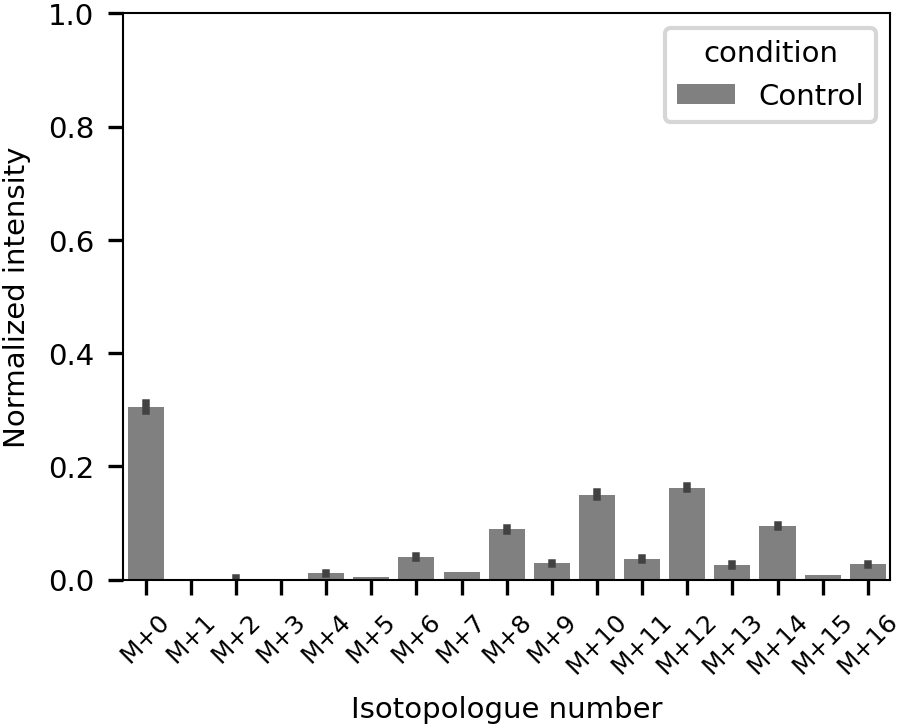

In [9]:
ax = sns.barplot(x="M", y="Normalized intensity", data=bulk_data_long[(bulk_data_long["fa"] == "Palmitate") & (bulk_data_long["condition"] == "Control")], hue="condition", palette=["grey"])
plt.xlabel("M+")
# xtick_pos = M
xtick_labels_m = ["M+%d"%d for d in range(17)]
ax.set_xticklabels(xtick_labels_m, fontsize=6)
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Isotopologue number")
ax.set_ylabel("Normalized intensity")
ax.set_ylim((0, 1))

plt.savefig(plots_path / "panel_b_1_bulk_control.png")
plt.savefig(plots_path / "panel_b_1_bulk_control.svg")

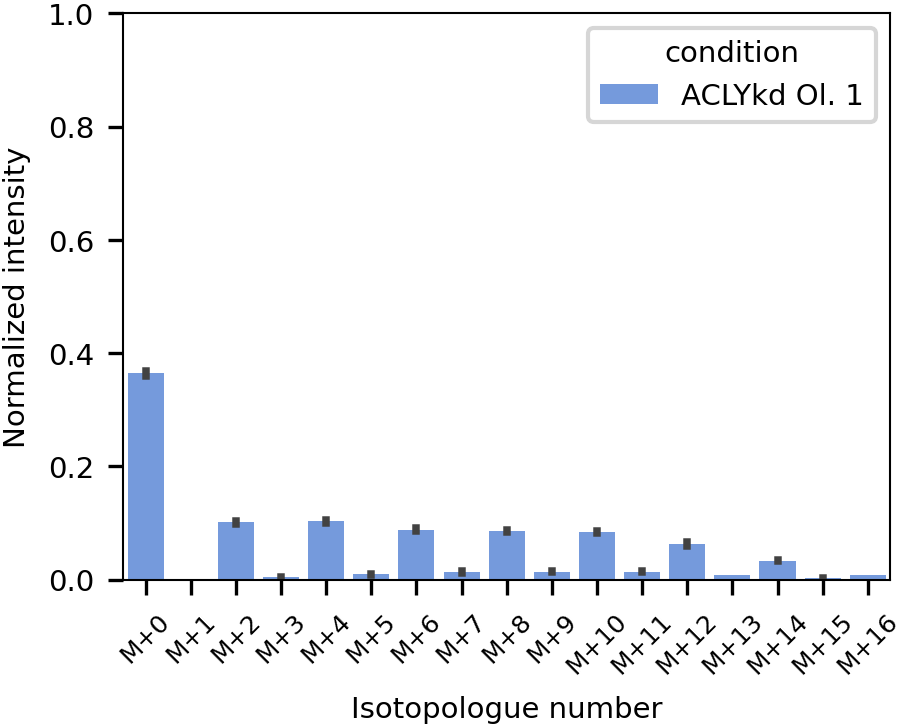

In [10]:
ax = sns.barplot(x="M", y="Normalized intensity", data=bulk_data_long[(bulk_data_long["fa"] == "Palmitate") & (bulk_data_long["condition"] == "ACLYkd Ol. 1")], hue="condition", palette=["cornflowerblue"])
plt.xlabel("M+")
# xtick_pos = M
xtick_labels_m = ["M+%d"%d for d in range(17)]
ax.set_xticklabels(xtick_labels_m, fontsize=6)
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Isotopologue number")
ax.set_ylabel("Normalized intensity")
ax.set_ylim((0, 1))

plt.savefig(plots_path / "panel_b_2_bulk_aclykd_ol1.png")
plt.savefig(plots_path / "panel_b_2_bulk_aclykd_ol1.svg")

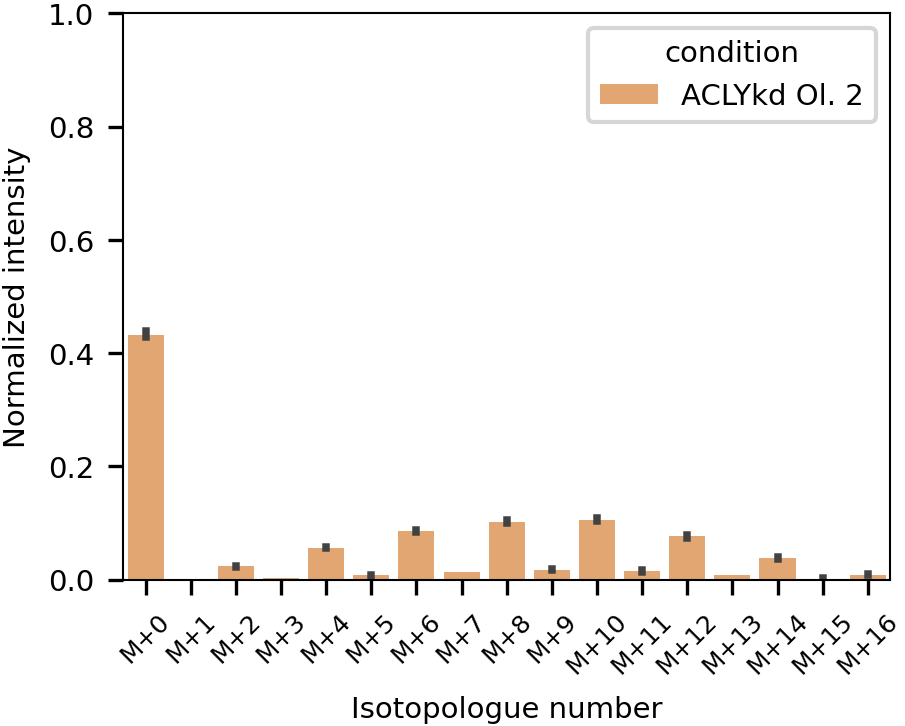

In [11]:
ax = sns.barplot(x="M", y="Normalized intensity", data=bulk_data_long[(bulk_data_long["fa"] == "Palmitate") & (bulk_data_long["condition"] == "ACLYkd Ol. 2")], hue="condition", palette=["sandybrown"])
plt.xlabel("M+")
# xtick_pos = M
xtick_labels_m = ["M+%d"%d for d in range(17)]
ax.set_xticklabels(xtick_labels_m, fontsize=6)
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Isotopologue number")
ax.set_ylabel("Normalized intensity")
ax.set_ylim((0, 1))

plt.savefig(plots_path / "panel_b_3_bulk_aclykd_ol2.png")
plt.savefig(plots_path / "panel_b_3_bulk_aclykd_ol2.svg")

### Single-cell data

### Load anndata

In [12]:
adata = sc.read_h5ad(adata_path)

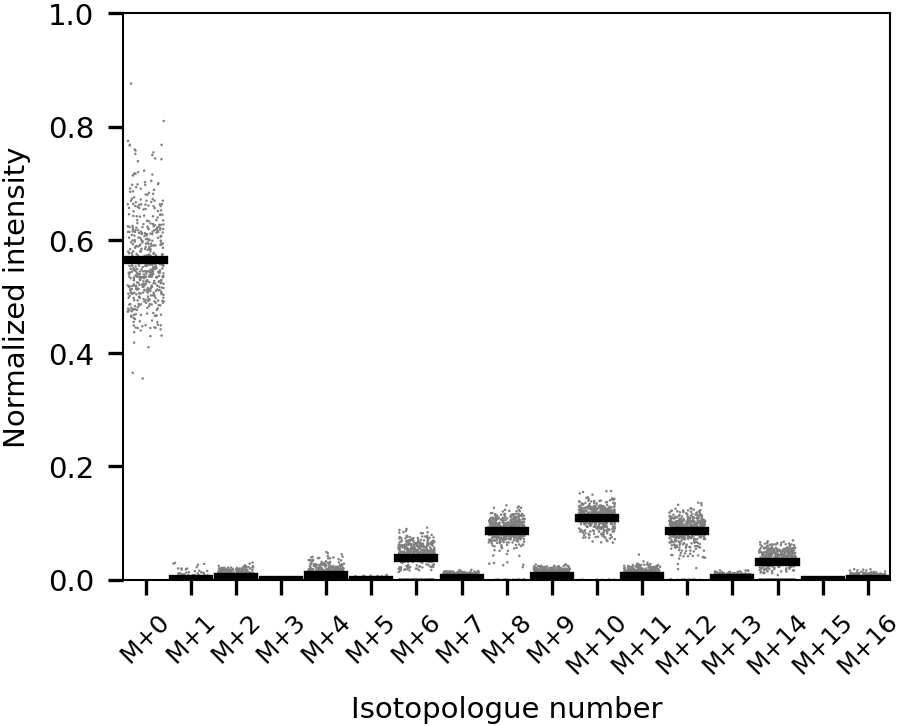

In [13]:
cond = "Wildtype"
ion = "C16H32O2-H"
adata_cond = adata[(adata.obs.condition == cond) & (adata.obs.growthConditions == "Labeled")]
ion_stripplot_bulk(adata_cond, ion, color="grey")
# plt.suptitle("Normalized corrected abundance of %s"%ion.unlabeled_annotation_id, y=1.05)
plt.ylabel("Normalized intensity")
plt.title("Control")
plt.title(None)
plt.savefig(plots_path / "panel_b_4_sc_control.png")
plt.savefig(plots_path / "panel_b_4_sc_control.svg")
plt.show()

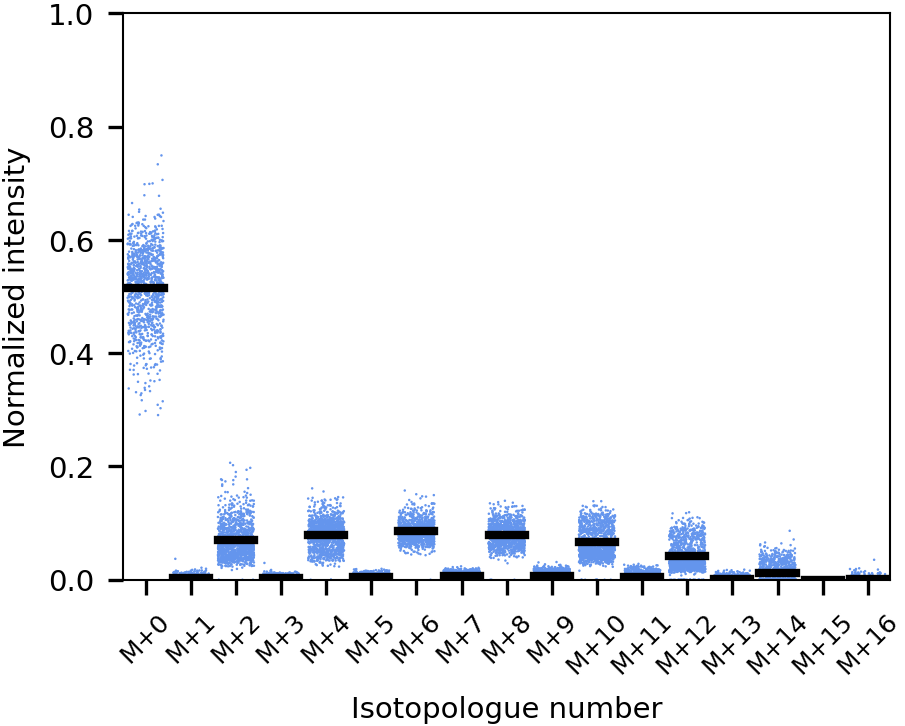

In [14]:
cond = "ACLY Ol.1"
ion = "C16H32O2-H"
adata_cond = adata[(adata.obs.condition == cond) & (adata.obs.growthConditions == "Labeled")]
ion_stripplot_bulk(adata_cond, ion, color="cornflowerblue")
# plt.suptitle("Normalized corrected abundance of %s"%ion.unlabeled_annotation_id, y=1.05)
plt.ylabel("Normalized intensity")
plt.title("ACLYkd Ol. 1")
plt.title(None)
plt.savefig(plots_path / "panel_b_5_sc_aclykd_ol1.png")
plt.savefig(plots_path / "panel_b_5_sc_aclykd_ol1.svg")
plt.show()

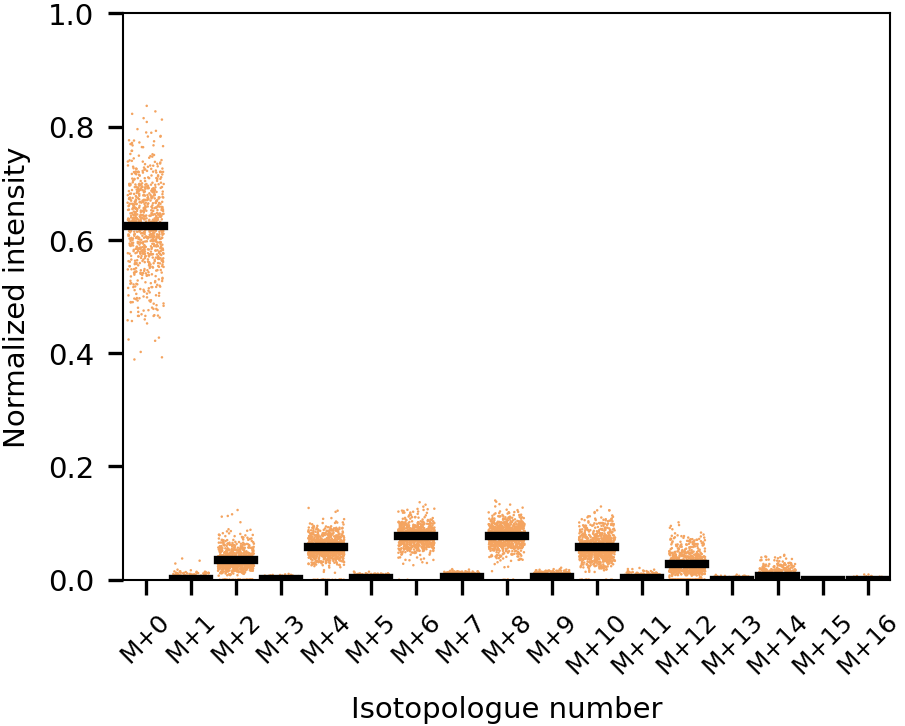

In [15]:
cond = "ACLYkd Ol.2"
ion = "C16H32O2-H"
adata_cond = adata[(adata.obs.condition == cond) & (adata.obs.growthConditions == "Labeled")]
ion_stripplot_bulk(adata_cond, ion, color="sandybrown")
# plt.suptitle("Normalized corrected abundance of %s"%ion.unlabeled_annotation_id, y=1.05)
plt.ylabel("Normalized intensity")
plt.title("ACLYkd Ol. 2")
plt.title(None)
plt.savefig(plots_path / "panel_b_6_sc_aclykd_ol2.png")
plt.savefig(plots_path / "panel_b_6_sc_aclykd_ol2.svg")
plt.show()

## Panel c

### Set paths

In [4]:
# Input
data_dir = Path(r"/media/buglakova/embl_data/data/lipid_isotope/20220411_AB_DKFZACLYac") 
anndata_dir = data_dir / "anndata"
adata_path = anndata_dir / "aclykd_adata_concat_fit.h5ad"
adata_am_path =anndata_dir / "aclykd_adata_am_concat.h5ad"
spacem_dir = data_dir / "slide2" / "spacem_data" / "W5"

# Output
plots_path = Path(r"/media/buglakova/embl_data/data/lipid_isotope/") / "figure_images" / "fig_03"
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load anndata

In [5]:
adata = sc.read_h5ad(adata_path)

[0.58352124 0.43456123]
7.1460477596118555 0.5104319828294183
[0.52176833 0.60710117]
9.405523657111788 0.6718231183651276


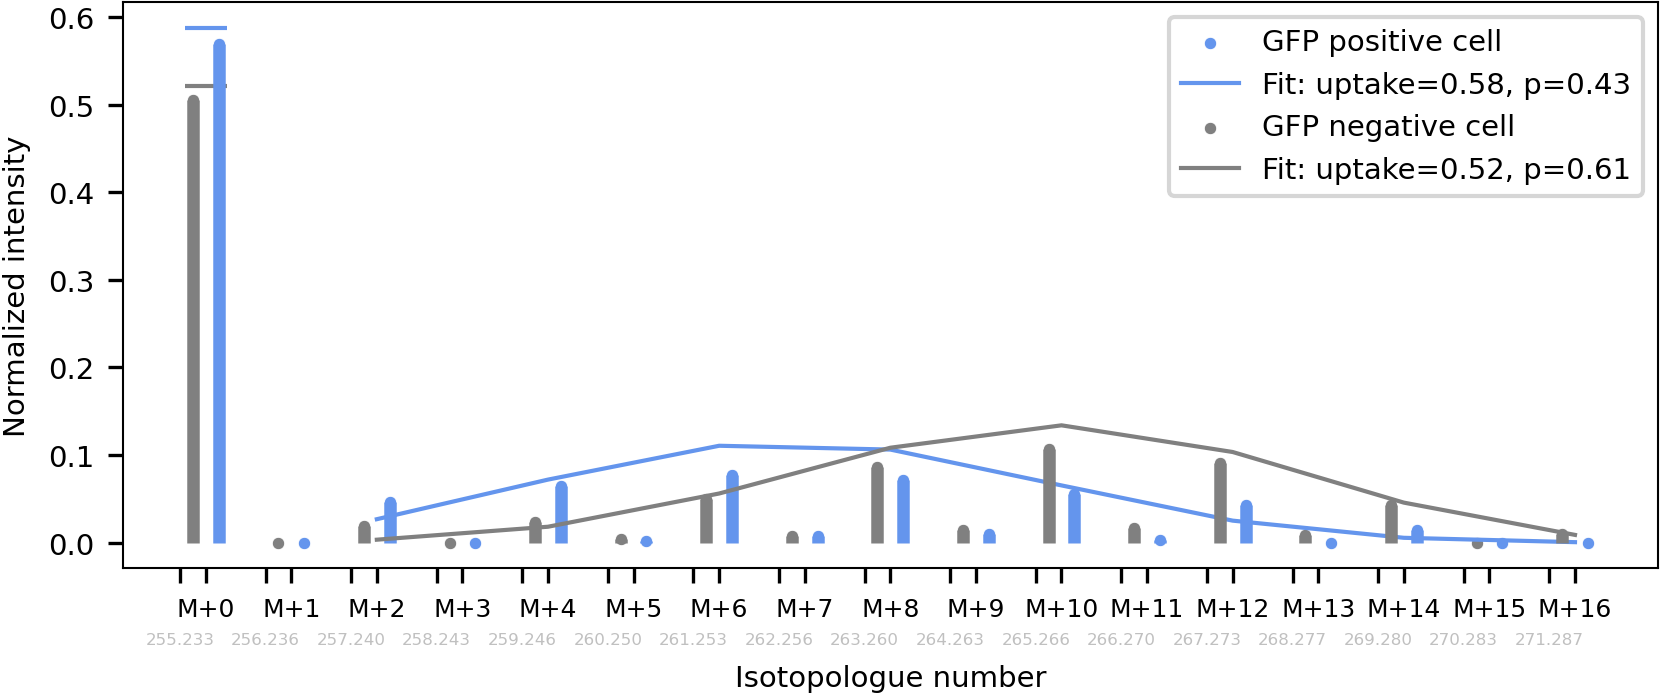

In [14]:
cell_idx = "12323-S2W5-1"
ion = 'C16H32O2-H'
layer = "corr_norm"

iso_dist = np.array(get_iso_dist(adata, ion, cell_idx, layer))
x, n, param, success = fit_binomial(iso_dist, "C16")
print(param)

iso_dist_even = iso_dist[2::2]
mean_M, mean_p = calculate_mean(iso_dist_even)
print(mean_M, mean_p)


fig, ax = plt.subplots(1, 1, figsize=(x_width * 2, y_width))

ax = plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax, dx=0.15, color="cornflowerblue", label="GFP positive cell")
ax.plot(np.arange(0, n*2, 2)[1:], model_C16(param, n)[1:], label=f"Fit: uptake={param[0]:1.2f}, p={param[1]:1.2f}", color="cornflowerblue")
ax.scatter([0], model_C16(param, n)[0], marker="_", s=100, color="cornflowerblue")
ax.legend()


cell_idx = "12377-S2W5-1"
ion = 'C16H32O2-H'
layer = "corr_norm"

iso_dist = np.array(get_iso_dist(adata, ion, cell_idx, layer))
x, n, param, success = fit_binomial(iso_dist, "C16")
print(param)

iso_dist_even = iso_dist[2::2]
mean_M, mean_p = calculate_mean(iso_dist_even)
print(mean_M, mean_p)

ax = plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax, dx=-0.15, label="GFP negative cell")
ax.plot(np.arange(0, n*2, 2)[1:], model_C16(param, n)[1:], label=f"Fit: uptake={param[0]:1.2f}, p={param[1]:1.2f}", color="gray")
ax.scatter([0], model_C16(param, n)[0], marker="_", s=100, color="gray")
ax.legend()




plt.ylabel("Normalized intensity")

plt.savefig(plots_path / "panel_c_1.png")
plt.savefig(plots_path / "panel_c_1.svg")

In [7]:
from sciso.parse_spacem_dir import add_spacem_images
from sciso.spatial_plot import *
import re
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar


ds_name, cell_masks, cropped_premaldi, cropped_postmaldi, am_masks, overlap_masks = add_spacem_images(spacem_dir)
print(ds_name)
match = re.match(r"S(\d)W(\d)", ds_name)
slide = int(match.group(1))
well = int(match.group(2))
print(f"Slide {slide} well {well}")


cell_contours = segm_masks_to_contours(cell_masks)
adata_SW = adata[(adata.obs.slide == slide) & (adata.obs.well == well)]


mapped_cells_gfp = map_obs_feature_to_masks(cell_contours, adata_SW, "log_gfp")
mapped_cells_p = map_obs_feature_to_masks(cell_masks, adata_SW, 'C16H32O2-H_p')
adata_SW.obs['gfp_class_int'] = adata_SW.obs['gfp_class'].astype(int)
mapped_cells_gfp_class = map_obs_feature_to_masks(cell_contours, adata_SW, 'gfp_class_int')
mapped_cells_p_contours = map_obs_feature_to_masks(cell_contours, adata_SW, 'C16H32O2-H_p')

S2W5
Slide 2 well 5


/home/buglakova/work/sc_isotope_tracing/sciso/spatial_plot.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_scaled[feature_scaled < 0] = 0
/home/buglakova/work/sc_isotope_tracing/sciso/spatial_plot.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_scaled[feature_scaled > 1] = 1
/home/buglakova/work/sc_isotope_tracing/sciso/spatial_plot.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_scaled[feature_sc

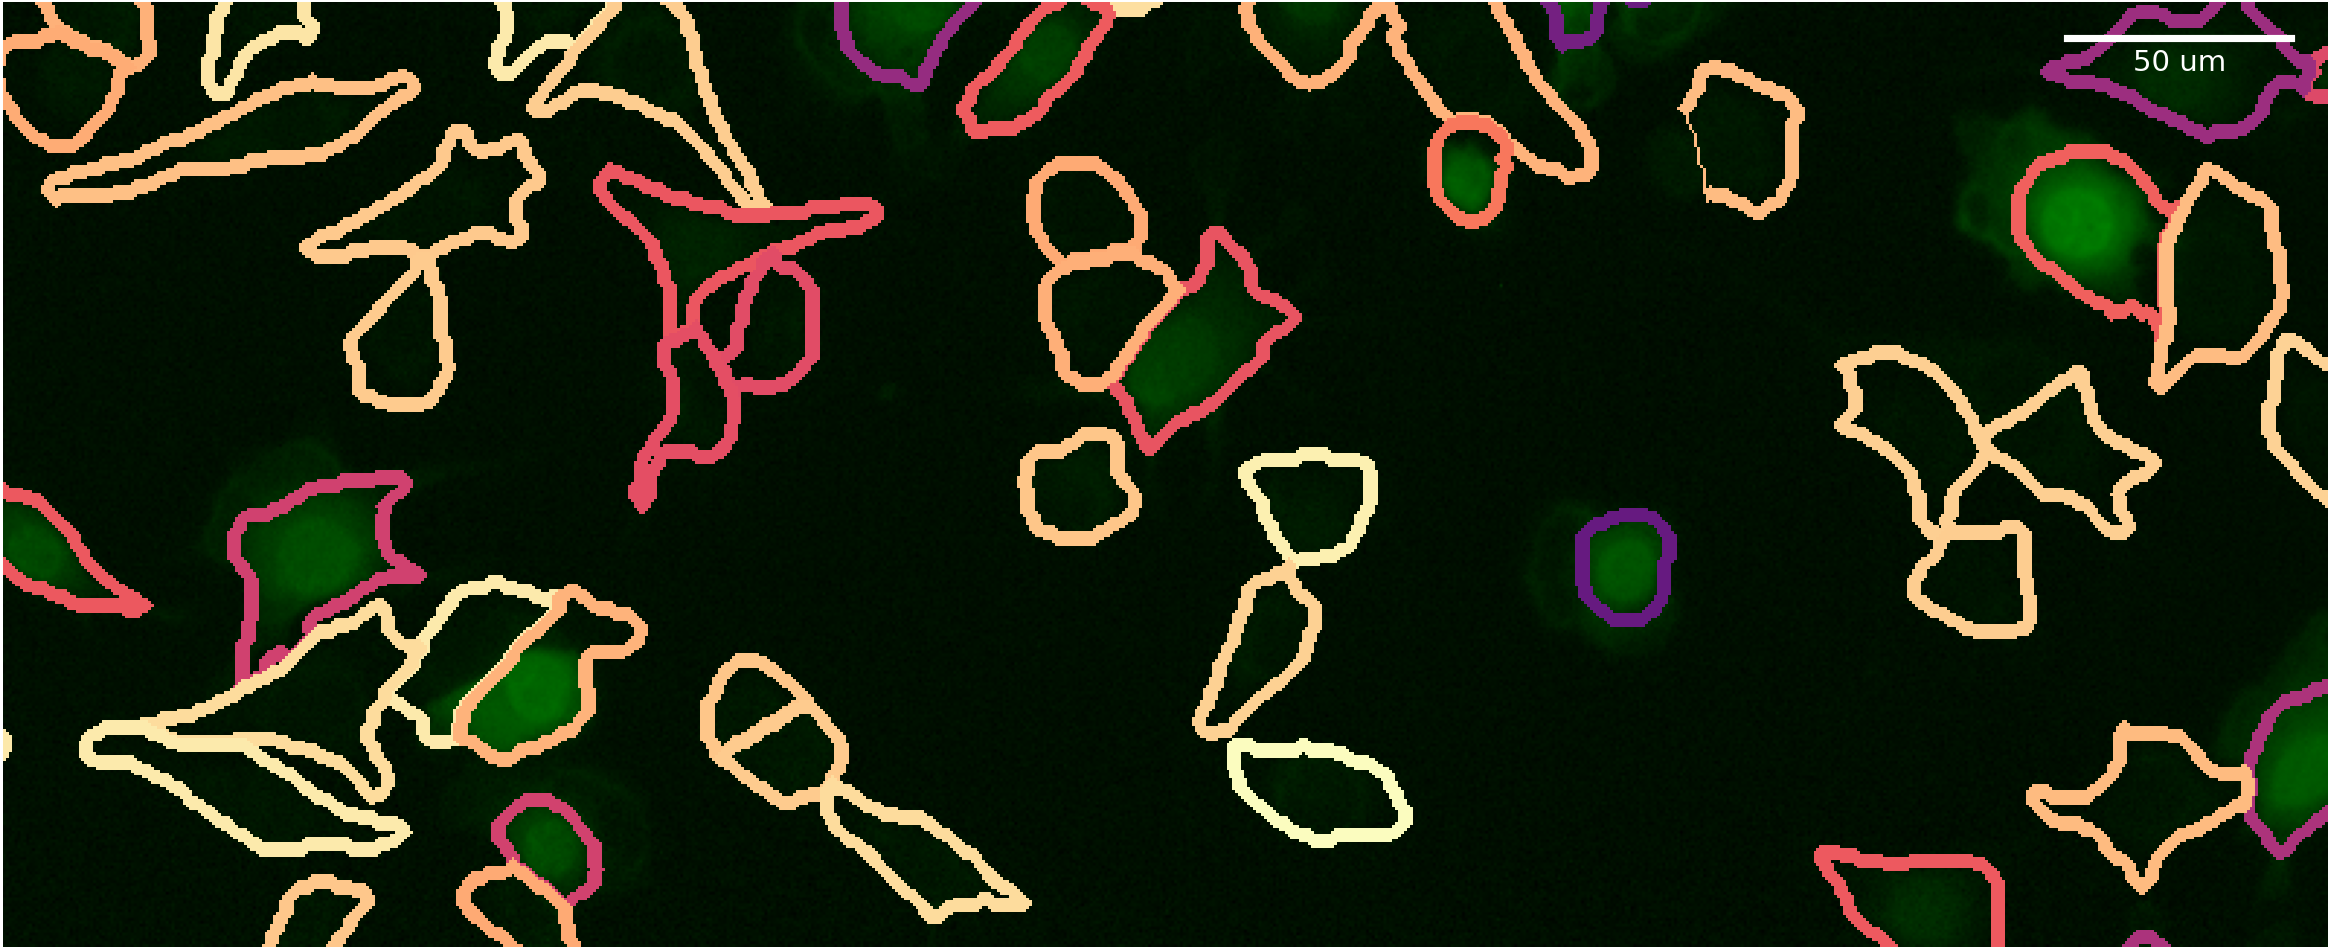

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
roi = np.s_[1275:1600, 300:1100]
# plt.imshow(np.log(cropped_premaldi["GFP"]), alpha=(np.log(cropped_premaldi["GFP"]) - np.log(cropped_premaldi["GFP"]).min()) / np.log(cropped_premaldi["GFP"]).max(), cmap="Greens")
# plt.imshow(cropped_premaldi["Trans"][roi], cmap="Greys_r")
# alpha_gfp = (np.log(cropped_premaldi["GFP"]) - np.log(cropped_premaldi["GFP"]).min()) / np.log(cropped_premaldi["GFP"]).max()
# plt.imshow(np.log(cropped_premaldi["GFP"])[roi], alpha=alpha_gfp[roi], cmap="Greens")
cmap = LinearSegmentedColormap.from_list("gfp_cmap", ["black", "green"], N=1000)
ax.imshow(np.log(cropped_premaldi["GFP"])[roi], cmap=cmap)
# plt.imshow(cell_masks, alpha = (cell_masks>0).astype(float), cmap="hsv")


# plt.imshow(mapped_cells_p[roi], alpha=0.5 * (mapped_cells_p[roi] > 0).astype(float), interpolation="nearest", cmap="magma")
ax.imshow(mapped_cells_p_contours[roi], alpha=(mapped_cells_p_contours[roi] > 0).astype(float), interpolation="nearest", cmap="magma")
# plt.imshow(mapped_cells_gfp_class[roi], alpha=(mapped_cells_gfp[roi] > 0).astype(float), interpolation="nearest", cmap="Greens")

scalebar = AnchoredSizeBar(ax.transData,
                           78, '50 um', 'upper right', 
                           pad=0.2,
                           color='white',
                           frameon=False,
                           size_vertical=1,
                           borderpad=1
                           )

ax.add_artist(scalebar)


plt.axis("off")
plt.savefig(plots_path / "panel_c_2.png")
plt.savefig(plots_path / "panel_c_2.svg")
plt.show()

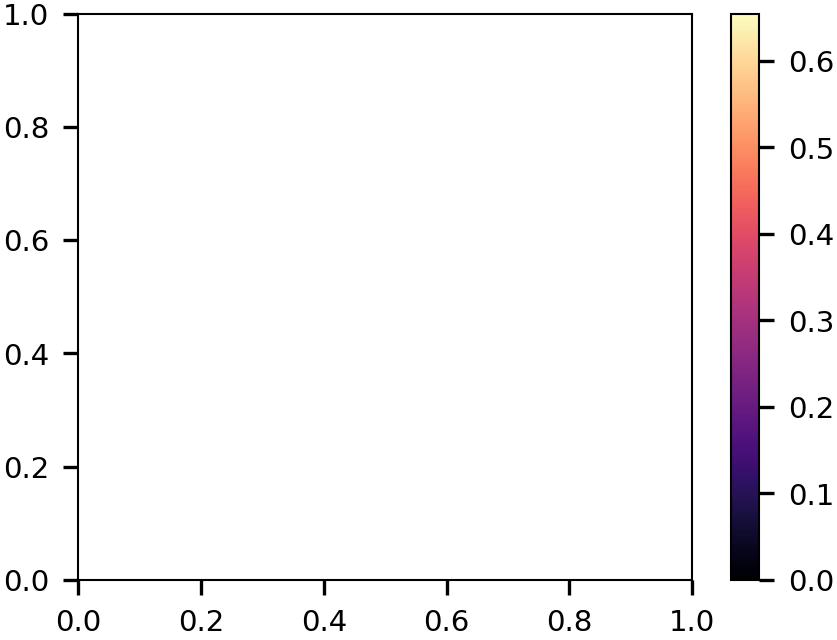

In [21]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

plt.colorbar(cm.ScalarMappable(norm=Normalize(mapped_cells_p_contours[roi].min(), mapped_cells_p_contours[roi].max()), cmap="magma"))

plt.savefig(plots_path / "panel_c_2_scalebar.png")
plt.savefig(plots_path / "panel_c_2_scalebar.svg")
plt.show()

## Panel c

### Set paths

In [22]:
# Input
data_dir = Path(r"/media/buglakova/embl_data/data/lipid_isotope/20220411_AB_DKFZACLYac") 
anndata_dir = data_dir / "anndata"
adata_path = anndata_dir / "aclykd_adata_concat_fit.h5ad"
adata_am_path =anndata_dir / "aclykd_adata_am_concat.h5ad"

# Output
plots_path = Path(r"/media/buglakova/embl_data/data/lipid_isotope/") / "figure_images" / "fig_03"
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load anndata

In [23]:
adata = sc.read_h5ad(adata_path)

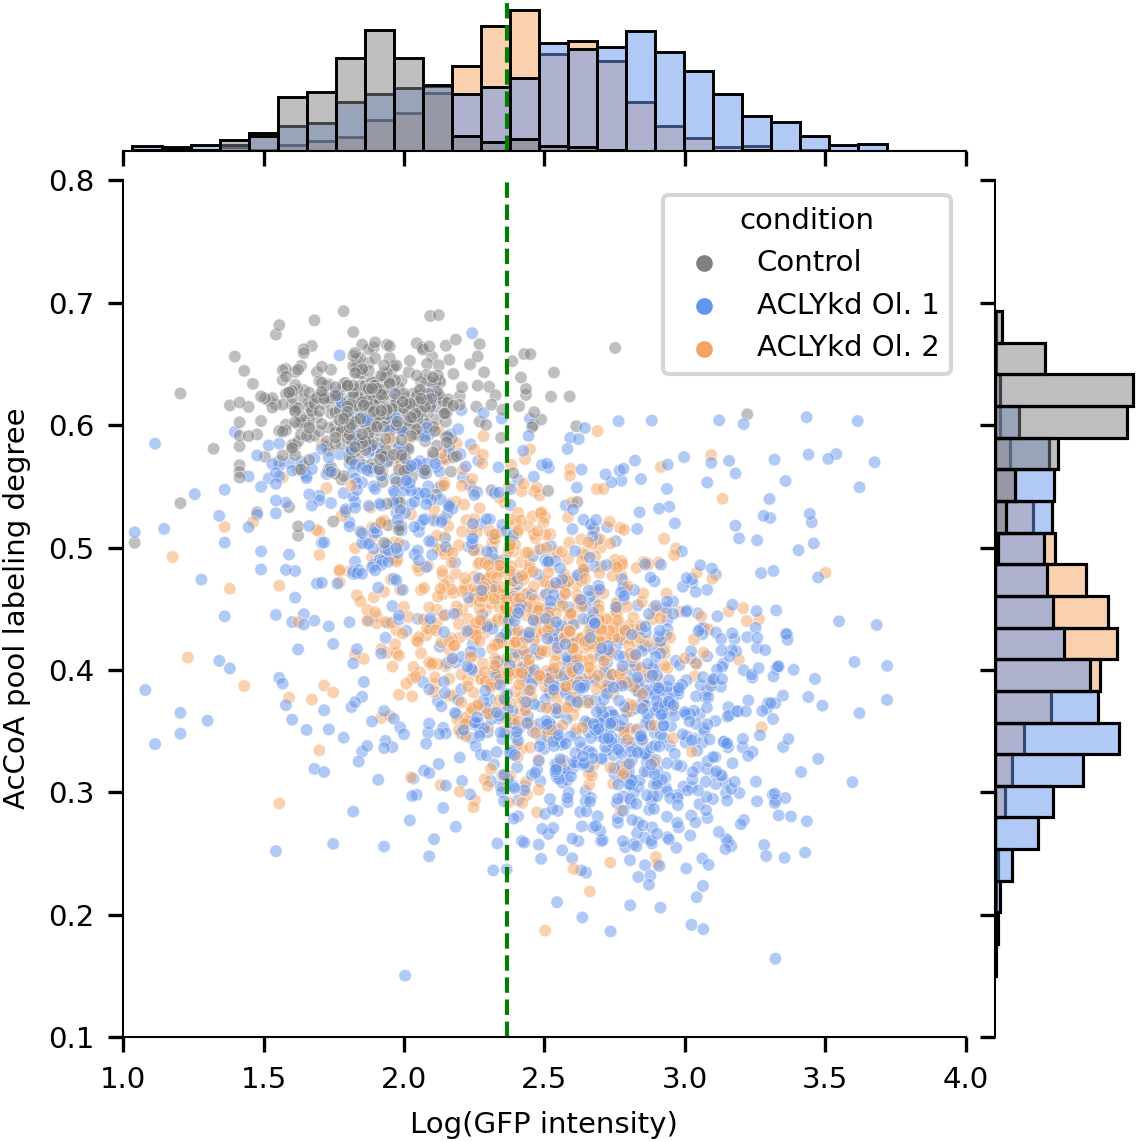

In [24]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")].obs
x_col = 'log_gfp'
y_col = 'C16H32O2-H_p'

condition_names = df["condition"].replace({'Wildtype': "Control", 'ACLY Ol.1': "ACLYkd Ol. 1", 'ACLYkd Ol.2': "ACLYkd Ol. 2"})

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue=condition_names, ylim=(0.1, 0.8), xlim=(1, 4), palette=["grey", "cornflowerblue", "sandybrown"], hue_order=['Control', 'ACLYkd Ol. 1', 'ACLYkd Ol. 2'], height=4)
p.plot_joint(sns.scatterplot, alpha=0.5)
p.plot_marginals(sns.histplot)
p.refline(x=adata.obs[adata.obs.gfp_class == 0].log_gfp.max(), label="GFP intensity threshold", color="green")
p.set_axis_labels(ylabel="AcCoA pool labeling degree", xlabel="Log(GFP intensity)")

plt.savefig(plots_path / "panel_d.png")
plt.savefig(plots_path / "panel_d.svg")

In [25]:
df_acly_ol1 = df[df["condition"] == 'ACLY Ol.1']
df_acly_ol1["strong_kd"]= df_acly_ol1['C16H32O2-H_p'] < 0.5
df_acly_ol1[["strong_kd", 'C16H32O2-H_p', "log_gfp"]].groupby(by="strong_kd").mean()

<ipython-input-25-799ee9c28c11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acly_ol1["strong_kd"]= df_acly_ol1['C16H32O2-H_p'] < 0.5


,C16H32O2-H_p,log_gfp
strong_kd,,
False,0.553309,2.155438
True,0.367967,2.646887


In [26]:
df_acly_ol1["strong_kd"].value_counts()

True     906
False    274
Name: strong_kd, dtype: int64

In [27]:
df_acly_wt = df[df["condition"] == 'Wildtype']
df_acly_wt["strong_kd"]= df_acly_wt['C16H32O2-H_p'] < 0.5
df_acly_wt[["strong_kd", 'C16H32O2-H_p', "log_gfp"]].groupby(by="strong_kd").mean()

<ipython-input-27-156986d4c5df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acly_wt["strong_kd"]= df_acly_wt['C16H32O2-H_p'] < 0.5


,C16H32O2-H_p,log_gfp
strong_kd,,
False,0.609266,1.889516


In [28]:
df.cell_area.mean() * 0.64 * 0.64

602.1749161087042

In [29]:
np.sqrt(602)

24.535688292770594

<AxesSubplot:>

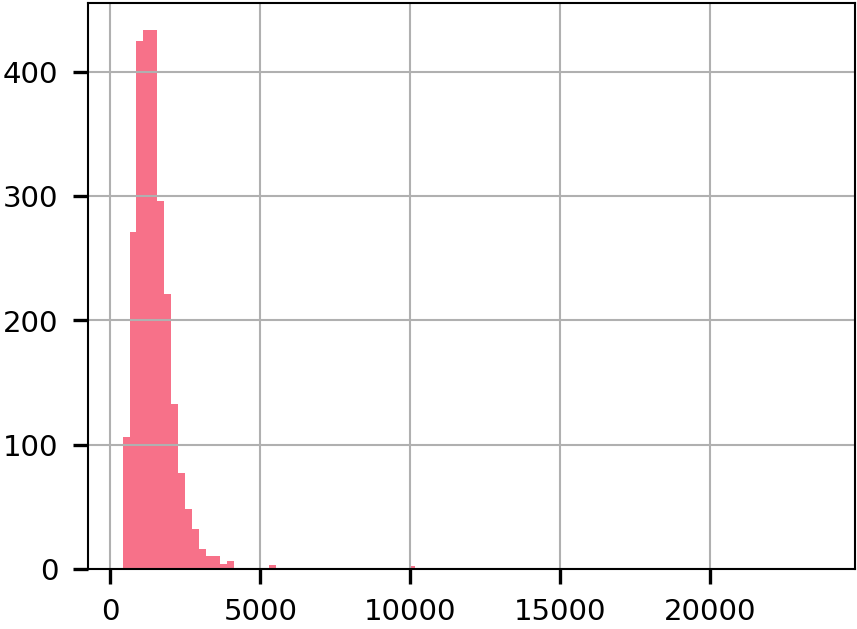

In [30]:
df.cell_area.hist(bins=100)

In [31]:
adata

AnnData object with n_obs × n_vars = 6257 × 87
    obs: 'center_x', 'center_y', 'cell_area', 'cell_sampling_area', 'cell_sampling_ratio', 'cell_nearest_am_distance', 'cell_nearest_cell_distance', 'centroid-0', 'centroid-1', 'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3', 'local_centroid-0', 'local_centroid-1', 'area', 'filled_area', 'solidity', 'perimeter', 'eccentricity', 'euler_number', 'moments_hu-0', 'moments_hu-1', 'moments_hu-2', 'moments_hu-3', 'moments_hu-4', 'moments_hu-5', 'moments_hu-6', 'moments_central-0-0', 'moments_central-0-1', 'moments_central-0-2', 'moments_central-0-3', 'moments_central-1-0', 'moments_central-1-1', 'moments_central-1-2', 'moments_central-1-3', 'moments_central-2-0', 'moments_central-2-1', 'moments_central-2-2', 'moments_central-2-3', 'moments_central-3-0', 'moments_central-3-1', 'moments_central-3-2', 'moments_central-3-3', 'inertia_tensor_eigvals-0', 'inertia_tensor_eigvals-1', 'major_axis_length', 'minor_axis_length', 'weighted_moments_central-0-0-Dapi', '

In [32]:
average_n_ams = np.mean(((df['bbox-2'] - df['bbox-0']) * 0.64 / 10) * ((df['bbox-3'] - df['bbox-1']) * 0.64 / 10))

In [33]:
average_n_ams

11.931007546278053